In [15]:
import pandas as pd

heart = pd.read_csv('heartdisease.csv')
 
heart

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [16]:
#misisng values
heart.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [17]:
# Check for missing values
print(heart.isna().sum())


HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


In [18]:
#Handling datatypes

from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Identify columns with dtype 'object' to apply label encoding
categorical_columns = heart.select_dtypes(include=['object']).columns

# Apply label encoding to each categorical column
for col in categorical_columns:
    heart[col] = label_encoder.fit_transform(heart[col])

# Display the first few rows of the encoded dataset
print(heart.head())


   HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0  16.60        1                0       0             3.0   
1             0  20.34        0                0       1             0.0   
2             0  26.58        1                0       0            20.0   
3             0  24.21        0                0       0             0.0   
4             0  23.71        0                0       0            28.0   

   MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0          30.0            0    0            7     5         2   
1           0.0            0    0           12     5         0   
2          30.0            0    1            9     5         2   
3           0.0            0    0           11     5         0   
4           0.0            1    0            4     5         0   

   PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
0                 1          4        5.0       1              0   

In [19]:
print(heart.dtypes)

HeartDisease          int32
BMI                 float64
Smoking               int32
AlcoholDrinking       int32
Stroke                int32
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int32
Sex                   int32
AgeCategory           int32
Race                  int32
Diabetic              int32
PhysicalActivity      int32
GenHealth             int32
SleepTime           float64
Asthma                int32
KidneyDisease         int32
SkinCancer            int32
dtype: object


In [20]:
#Identifying outliers
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = heart['BMI'].quantile(0.25)
Q3 = heart['BMI'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = heart[(heart['BMI'] < lower_bound) | (heart['BMI'] > upper_bound)]
print("Outliers based on IQR method:\n", outliers)


Outliers based on IQR method:
         HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
32                 0  45.35        0                0       0            30.0   
57                 0  46.52        1                0       0            30.0   
90                 0  44.29        0                0       0            30.0   
105                0  58.54        0                0       0            30.0   
107                0  45.42        0                0       0             0.0   
...              ...    ...      ...              ...     ...             ...   
319693             0  44.29        0                0       0             0.0   
319709             0  51.46        1                0       0            30.0   
319725             0  53.16        0                0       0            29.0   
319777             0  42.57        0                0       0             0.0   
319794             0  46.56        0                0       0             0.0 

In [21]:
#removing
# Remove outliers by filtering the data within the bounds
heart_cleaned = heart[(heart['BMI'] >= lower_bound) & (heart['BMI'] <= upper_bound)]

# Display the cleaned dataset
print("Data after removing outliers:\n", heart_cleaned.head())

Data after removing outliers:
    HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0  16.60        1                0       0             3.0   
1             0  20.34        0                0       1             0.0   
2             0  26.58        1                0       0            20.0   
3             0  24.21        0                0       0             0.0   
4             0  23.71        0                0       0            28.0   

   MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0          30.0            0    0            7     5         2   
1           0.0            0    0           12     5         0   
2          30.0            0    1            9     5         2   
3           0.0            0    0           11     5         0   
4           0.0            1    0            4     5         0   

   PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
0                 1          4      

In [22]:
#Normalization

# Select all numerical columns including 'float64'
numerical_columns = heart.select_dtypes(include=['float64']).columns

# Apply Min-Max scaling or Standardization to all numerical columns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
heart[numerical_columns] = scaler.fit_transform(heart[numerical_columns])


In [24]:
print(heart.dtypes)

HeartDisease          int32
BMI                 float64
Smoking               int32
AlcoholDrinking       int32
Stroke                int32
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int32
Sex                   int32
AgeCategory           int32
Race                  int32
Diabetic              int32
PhysicalActivity      int32
GenHealth             int32
SleepTime           float64
Asthma                int32
KidneyDisease         int32
SkinCancer            int32
dtype: object


# Apply decision tree

Decision Tree Accuracy:  0.8631526282325227
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92     87649
           1       0.23      0.25      0.24      8290

    accuracy                           0.86     95939
   macro avg       0.58      0.59      0.58     95939
weighted avg       0.87      0.86      0.87     95939



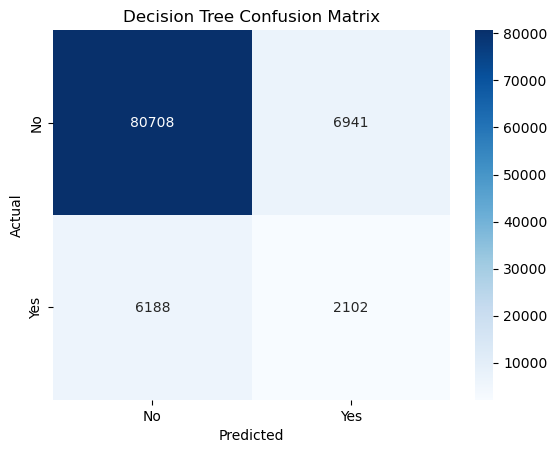

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Split the dataset into features (X) and target (y)
X = heart.drop('HeartDisease', axis=1)  # Features
y = heart['HeartDisease']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_conf_matrix = confusion_matrix(y_test, y_pred_dt)

# Display results
print("Decision Tree Accuracy: ", dt_accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# Plot Confusion Matrix (Heatmap)
sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# KNN

kNN Accuracy:  0.9056275341623323
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     87649
           1       0.37      0.13      0.19      8290

    accuracy                           0.91     95939
   macro avg       0.64      0.55      0.57     95939
weighted avg       0.87      0.91      0.88     95939



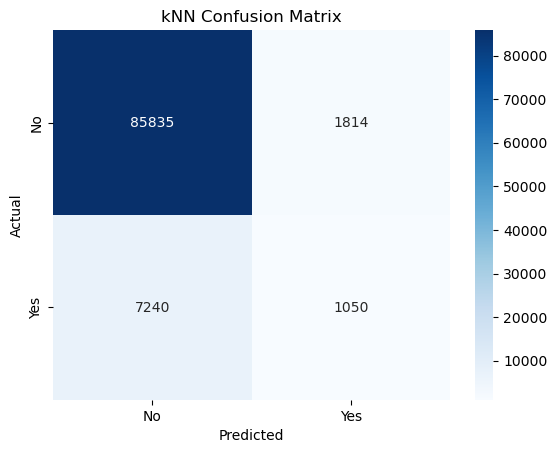

In [26]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the kNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Display results
print("kNN Accuracy: ", knn_accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

# Plot Confusion Matrix (Heatmap)
sns.heatmap(knn_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('kNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


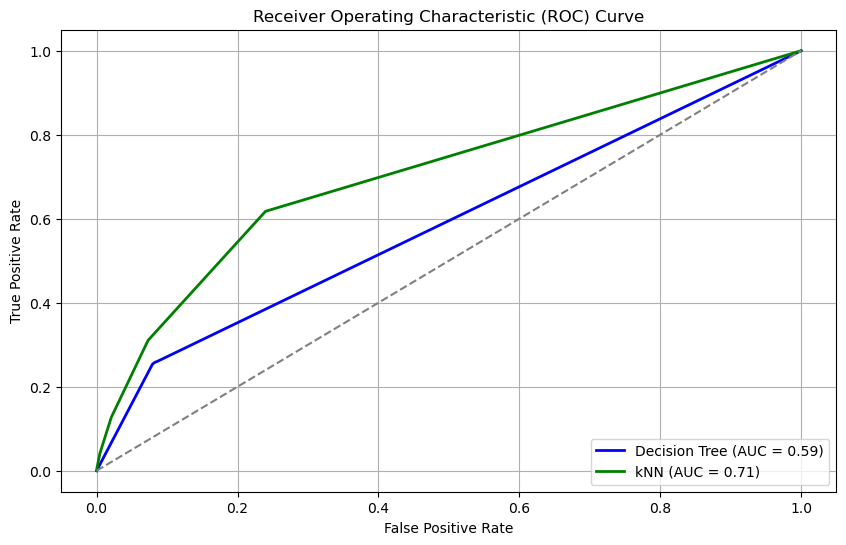

In [27]:
#Conaprison ROC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_classifier.predict_proba(X_test)[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Compute ROC curve for kNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_classifier.predict_proba(X_test)[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curves for both models
plt.figure(figsize=(10, 6))
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label=f'kNN (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
